In [1]:
# pip install jinja2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

from scipy.stats import pearsonr
from tqdm import tqdm

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>معرفی داده ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #79c2d0; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #142d4c;
            border-right: 6px solid #79c2d0;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>معرفی داده ها</h2>
        <div class="note">
            سیستم نظارت بر عوامل مخاطرات رفتاری یک نظرسنجی تلفنی مربوط به سلامت است که سالانه توسط مرکز کنترل و پیشگیری از بیماری‌ها در آمریکا جمع‌آوری می‌شود.
            هر سال، این نظرسنجی پاسخ‌های بیش از ۴۰۰،۰۰۰ آمریکایی را در مورد رفتارهای خطرناک سلامت، بیماری‌های مزمن و استفاده از خدمات پیشگیری جمع‌آوری می‌کند.
            این نظرسنجی هر ساله از سال ۱۹۸۴ برگزار می‌شود. نتایج این نظرسنجی در سال 2015 در فایلی با فرمت csv در دسترس است.
            این مجموعه داده اصلی شامل پاسخ‌های ۴۴۱،۴۵۵ پرسش‌شونده و ۳۳۰ ویژگی است. این ویژگی‌ها یا به‌صورت مستقیم از شرکت‌کنندگان پرسیده شده‌اند و یا متغیرهای محاسبه‌شده بر اساس پاسخ‌های شرکت‌کنندگان فردی هستند.
        </div>
        <div class="note">
        جدول زیر داده‌ی تمیز شده شامل 21 ویژگی و ۲۵۳،۸۶۰ ردیف از پاسخ‌های افراد به نظرسنجی BRFSS در سال 2015 است. متغیر هدف (Diabetes_012)  در این داده از سه کلاس تشکیل شده است:
- عدم ابتلا به دیابت و یا دیابت در دوران بارداری (0)
- پیش دیابت (1)
- دیابت (2)
        </div>
    </div>
</body>
</html>


In [2]:
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)
print(data.shape)
print(f'COLUMNS ARE ---->\n {data.columns}')
data

(253680, 22)
COLUMNS ARE ---->
 Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #FF8080; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #A34343;
            border-right: 6px solid #7D0A0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پرسش 1</h2>
        <div class="note">
              آیا نتایج نظرسنجی شانسی برای ارائه یک پیش‌بینی قابل قبول از وضعیت فرد دارد؟برای پاسخ به این سوال یک بررسی توصیفی کفایت می‌کند، نیازی به مدلسازی برای پاسخ به این سوال نیست. (سعی کنید با بررسی نحوه توزیع گروه‌های مختلف (دیابت/پیش‌دیابت/ عدم دیابت) در رابطه با مقادیر مختلف ویژگی‌های نمونه‌های موجود، به یک توصیف کیفی و کمی برسید).
        </div>
    </div>
</body>
</html>


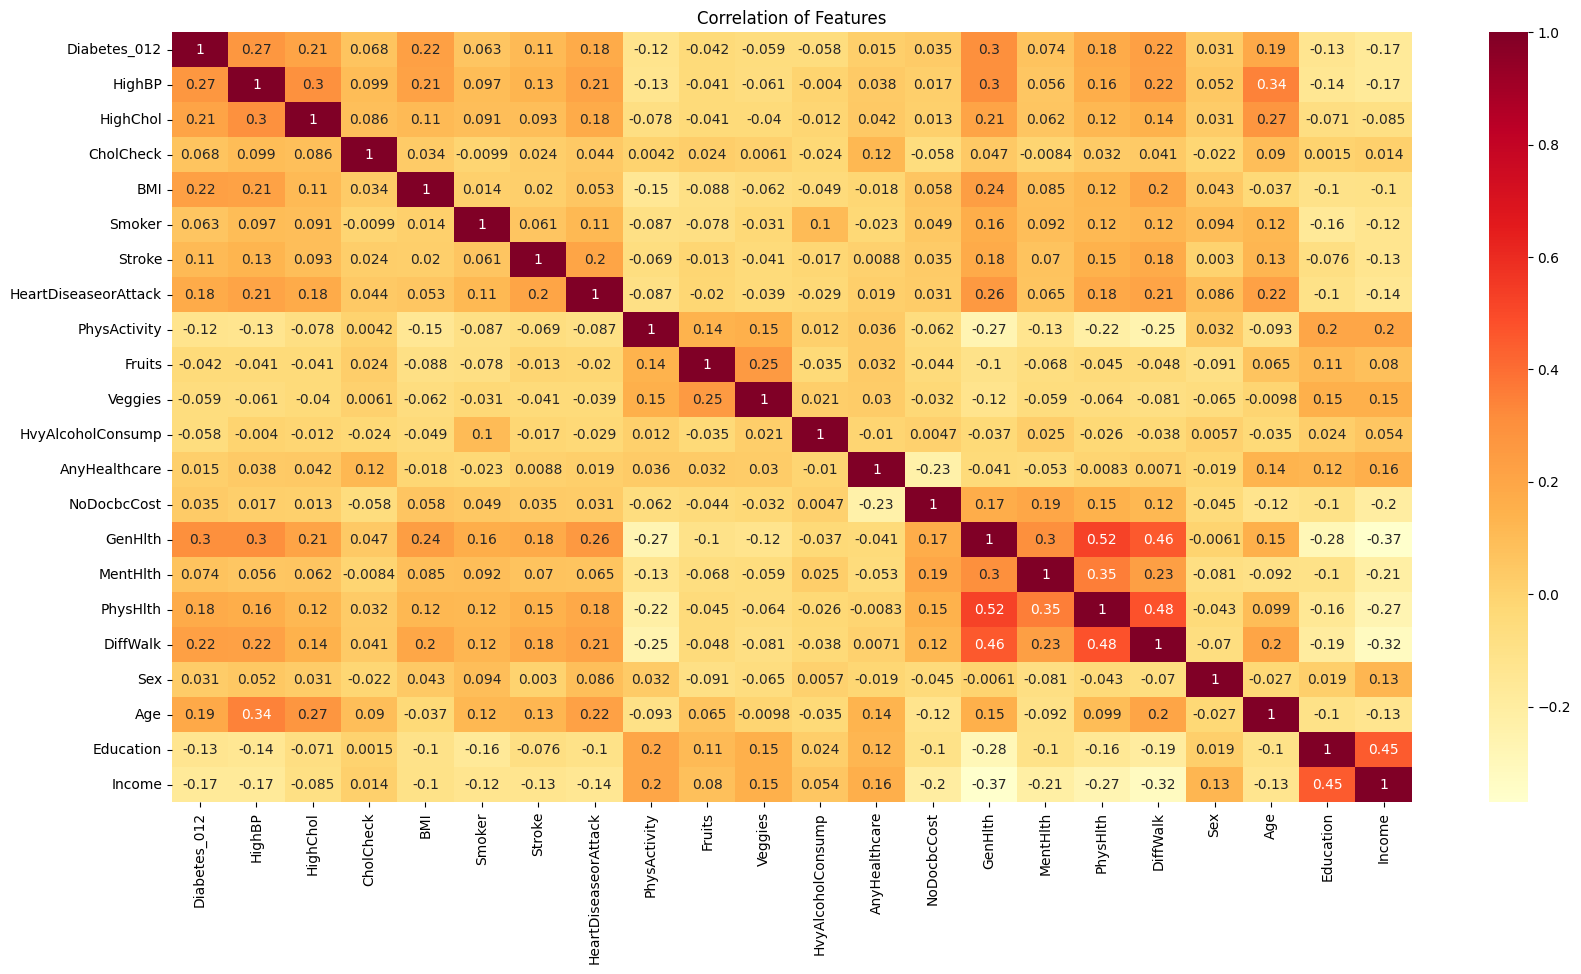

GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Income                  0.171483
Education               0.130517
PhysActivity            0.121947
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
Veggies                 0.058972
HvyAlcoholConsump       0.057882
Fruits                  0.042192
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Name: Diabetes_012, dtype: float64


In [3]:
correlation = data.corr()

sorted_correlation = correlation['Diabetes_012'].abs().sort_values(ascending=False)
sorted_correlation = sorted_correlation[sorted_correlation.index != 'Diabetes_012']  

plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='YlOrRd')
plt.title("Correlation of Features")
plt.show()
print('\033[93m' + str(sorted_correlation) + '\033[0m')

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

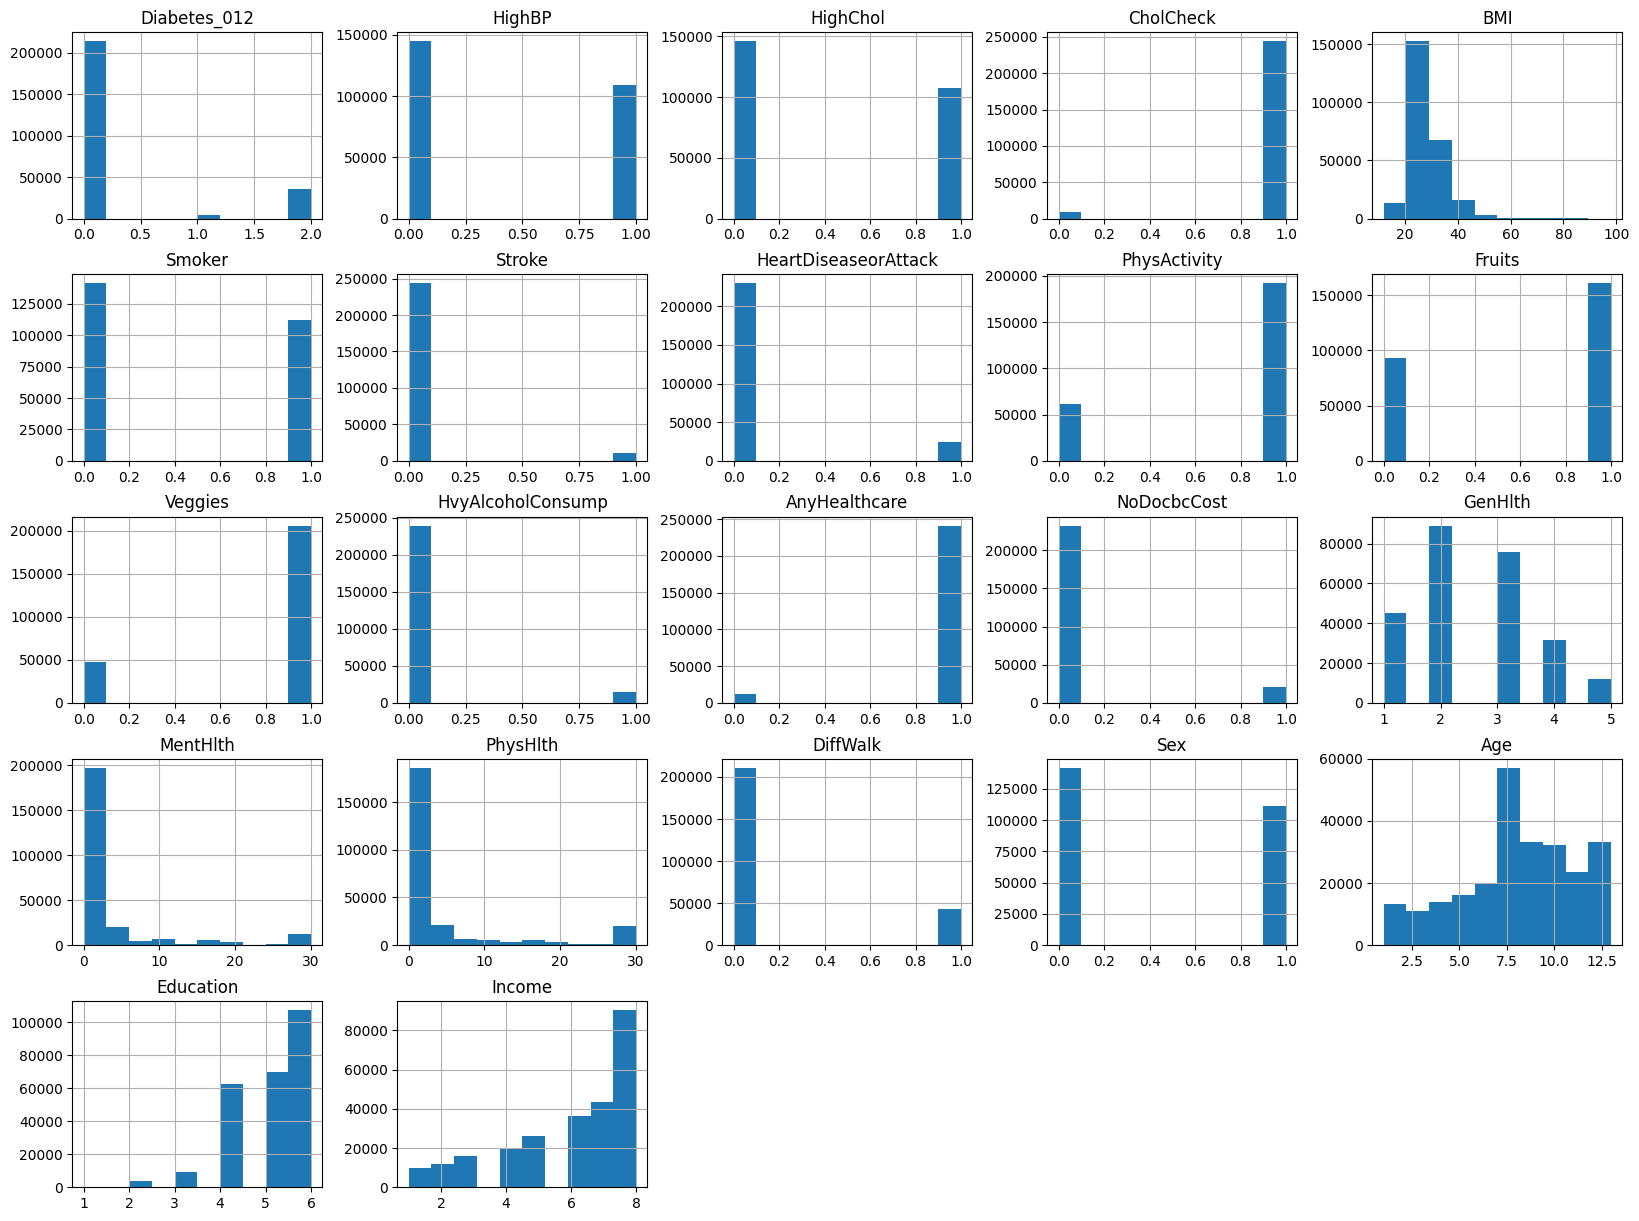

In [4]:
data.hist(figsize=(20,15))

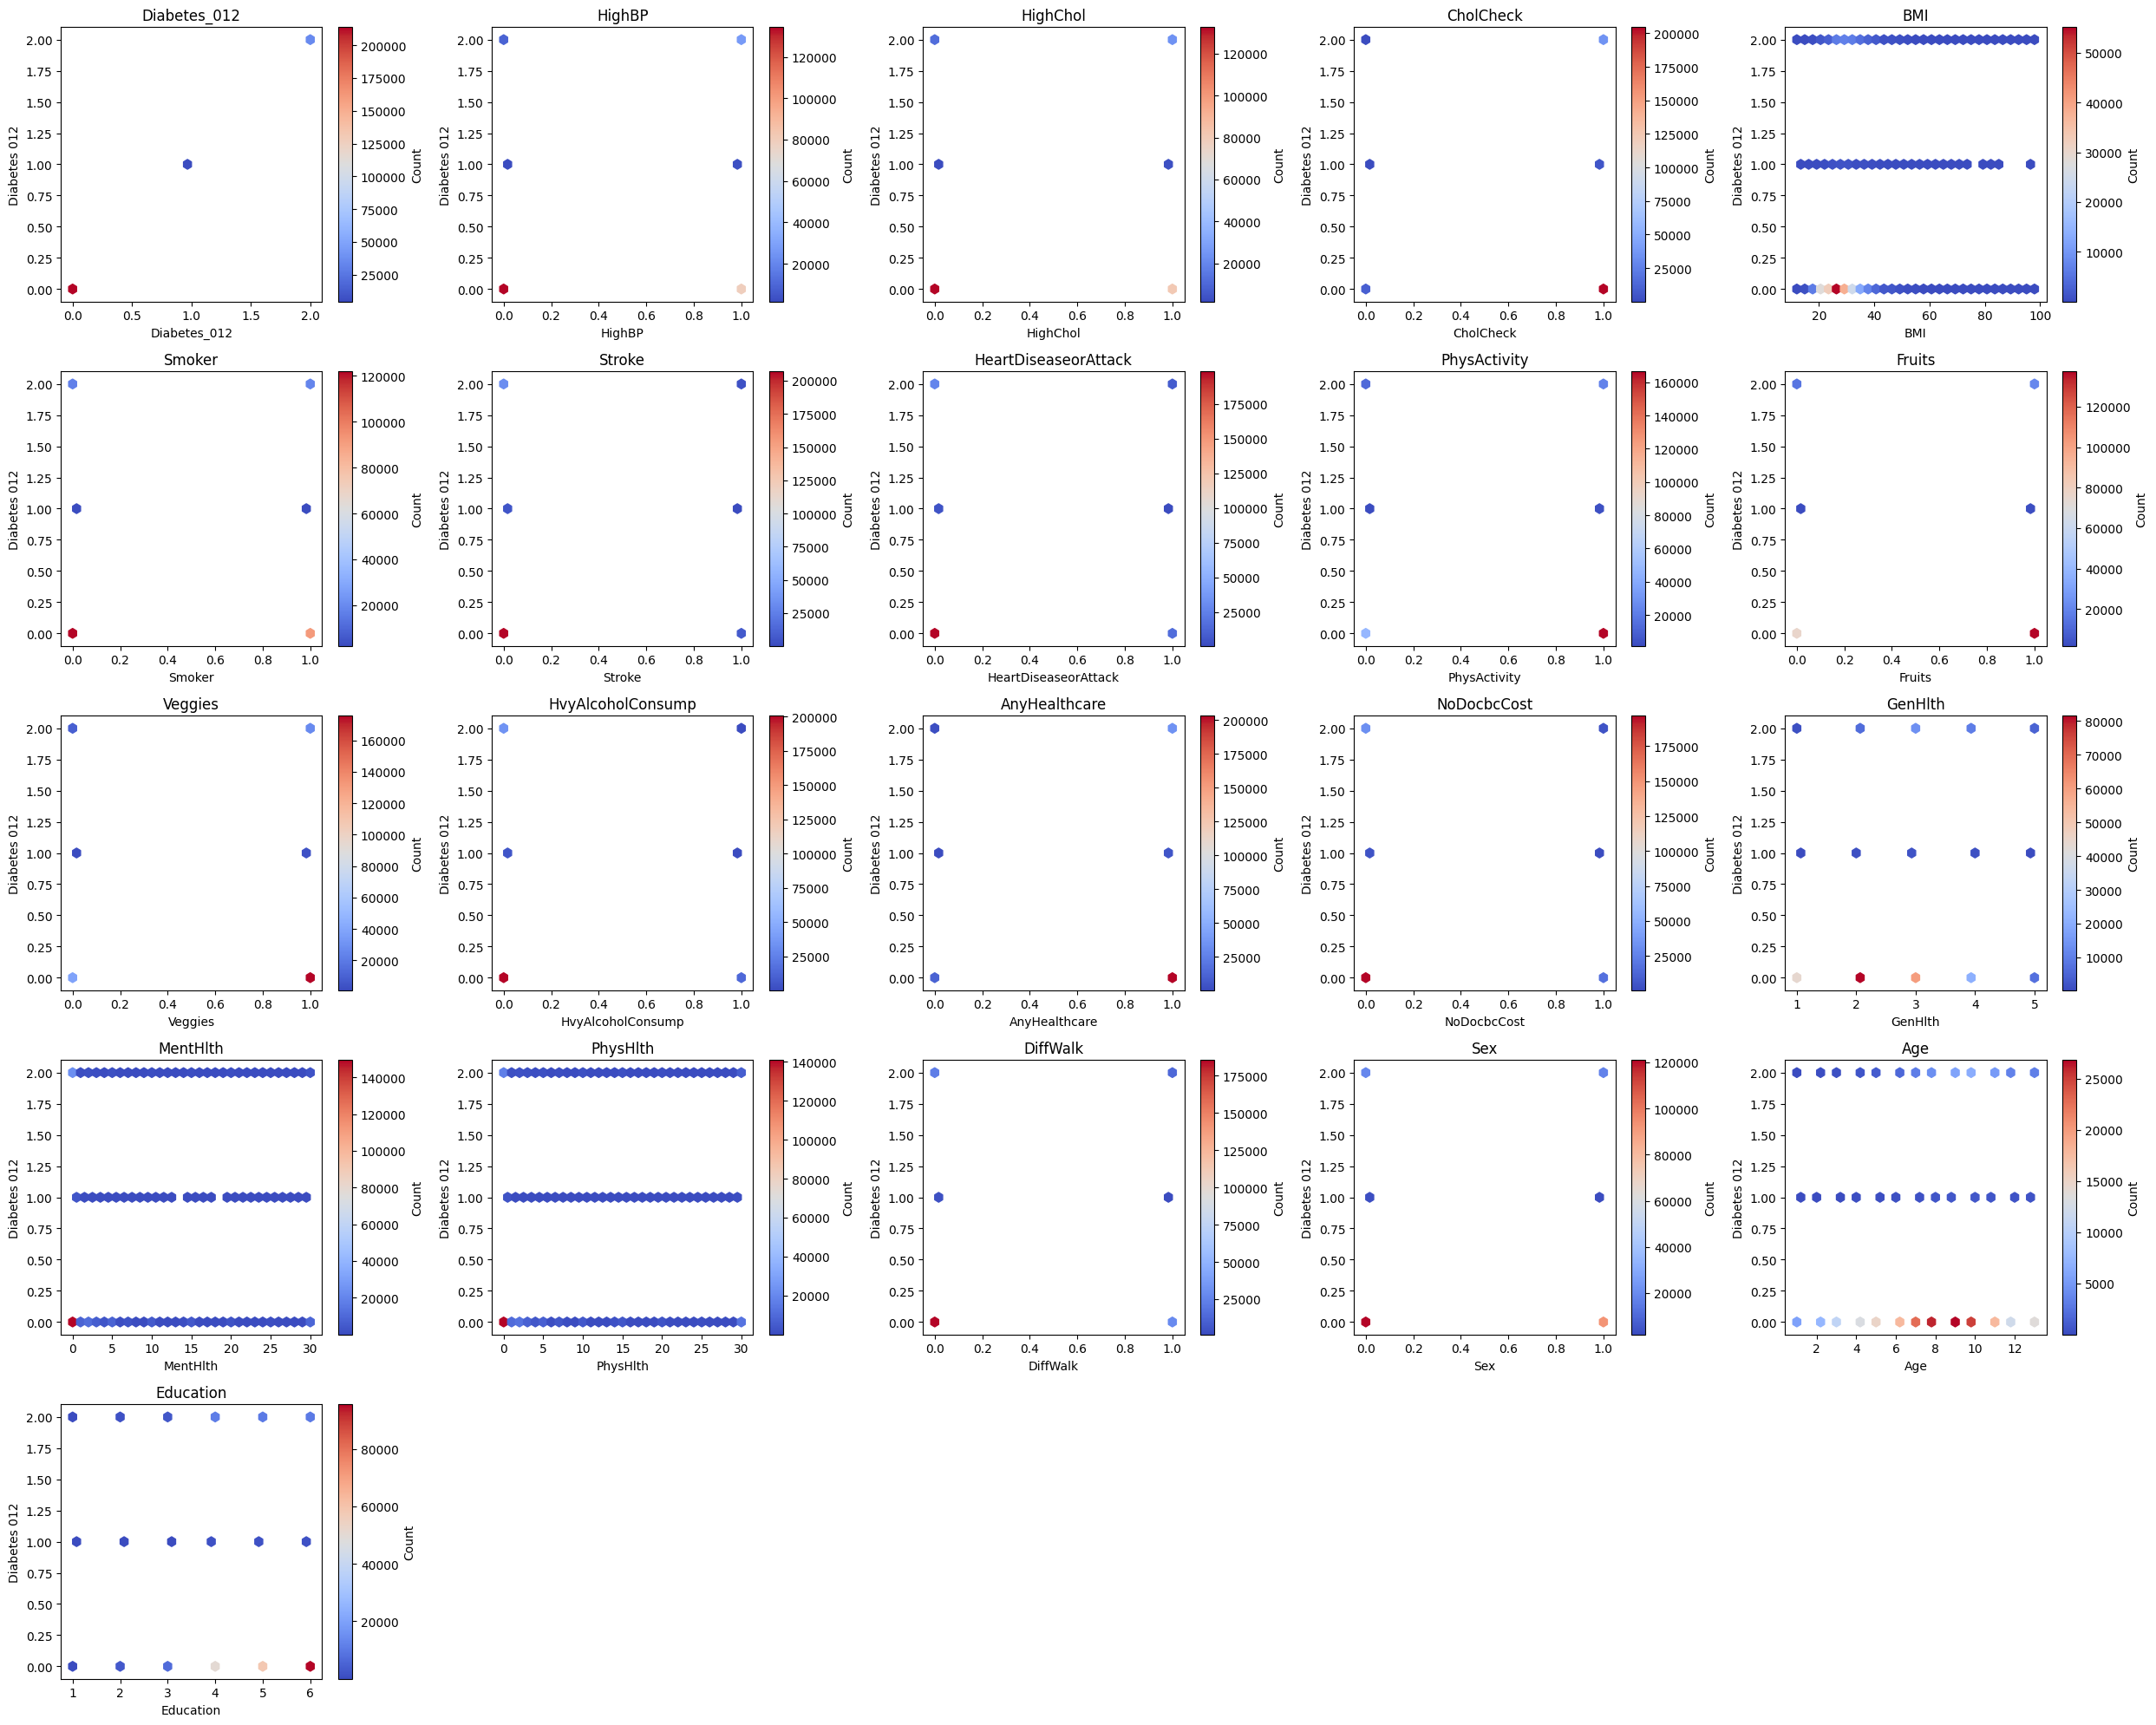

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(25, 20))
axes = axes.flatten()  
for i, column in enumerate(data.columns[:-1]):  
    ax = axes[i]
    hb = ax.hexbin(data[column], data['Diabetes_012'], gridsize=30, cmap='coolwarm', mincnt=1)
    ax.set_xlabel(column)
    ax.set_ylabel('Diabetes 012')
    ax.set_title(f'{column}')
    fig.colorbar(hb, ax=ax, label='Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


<Axes: >

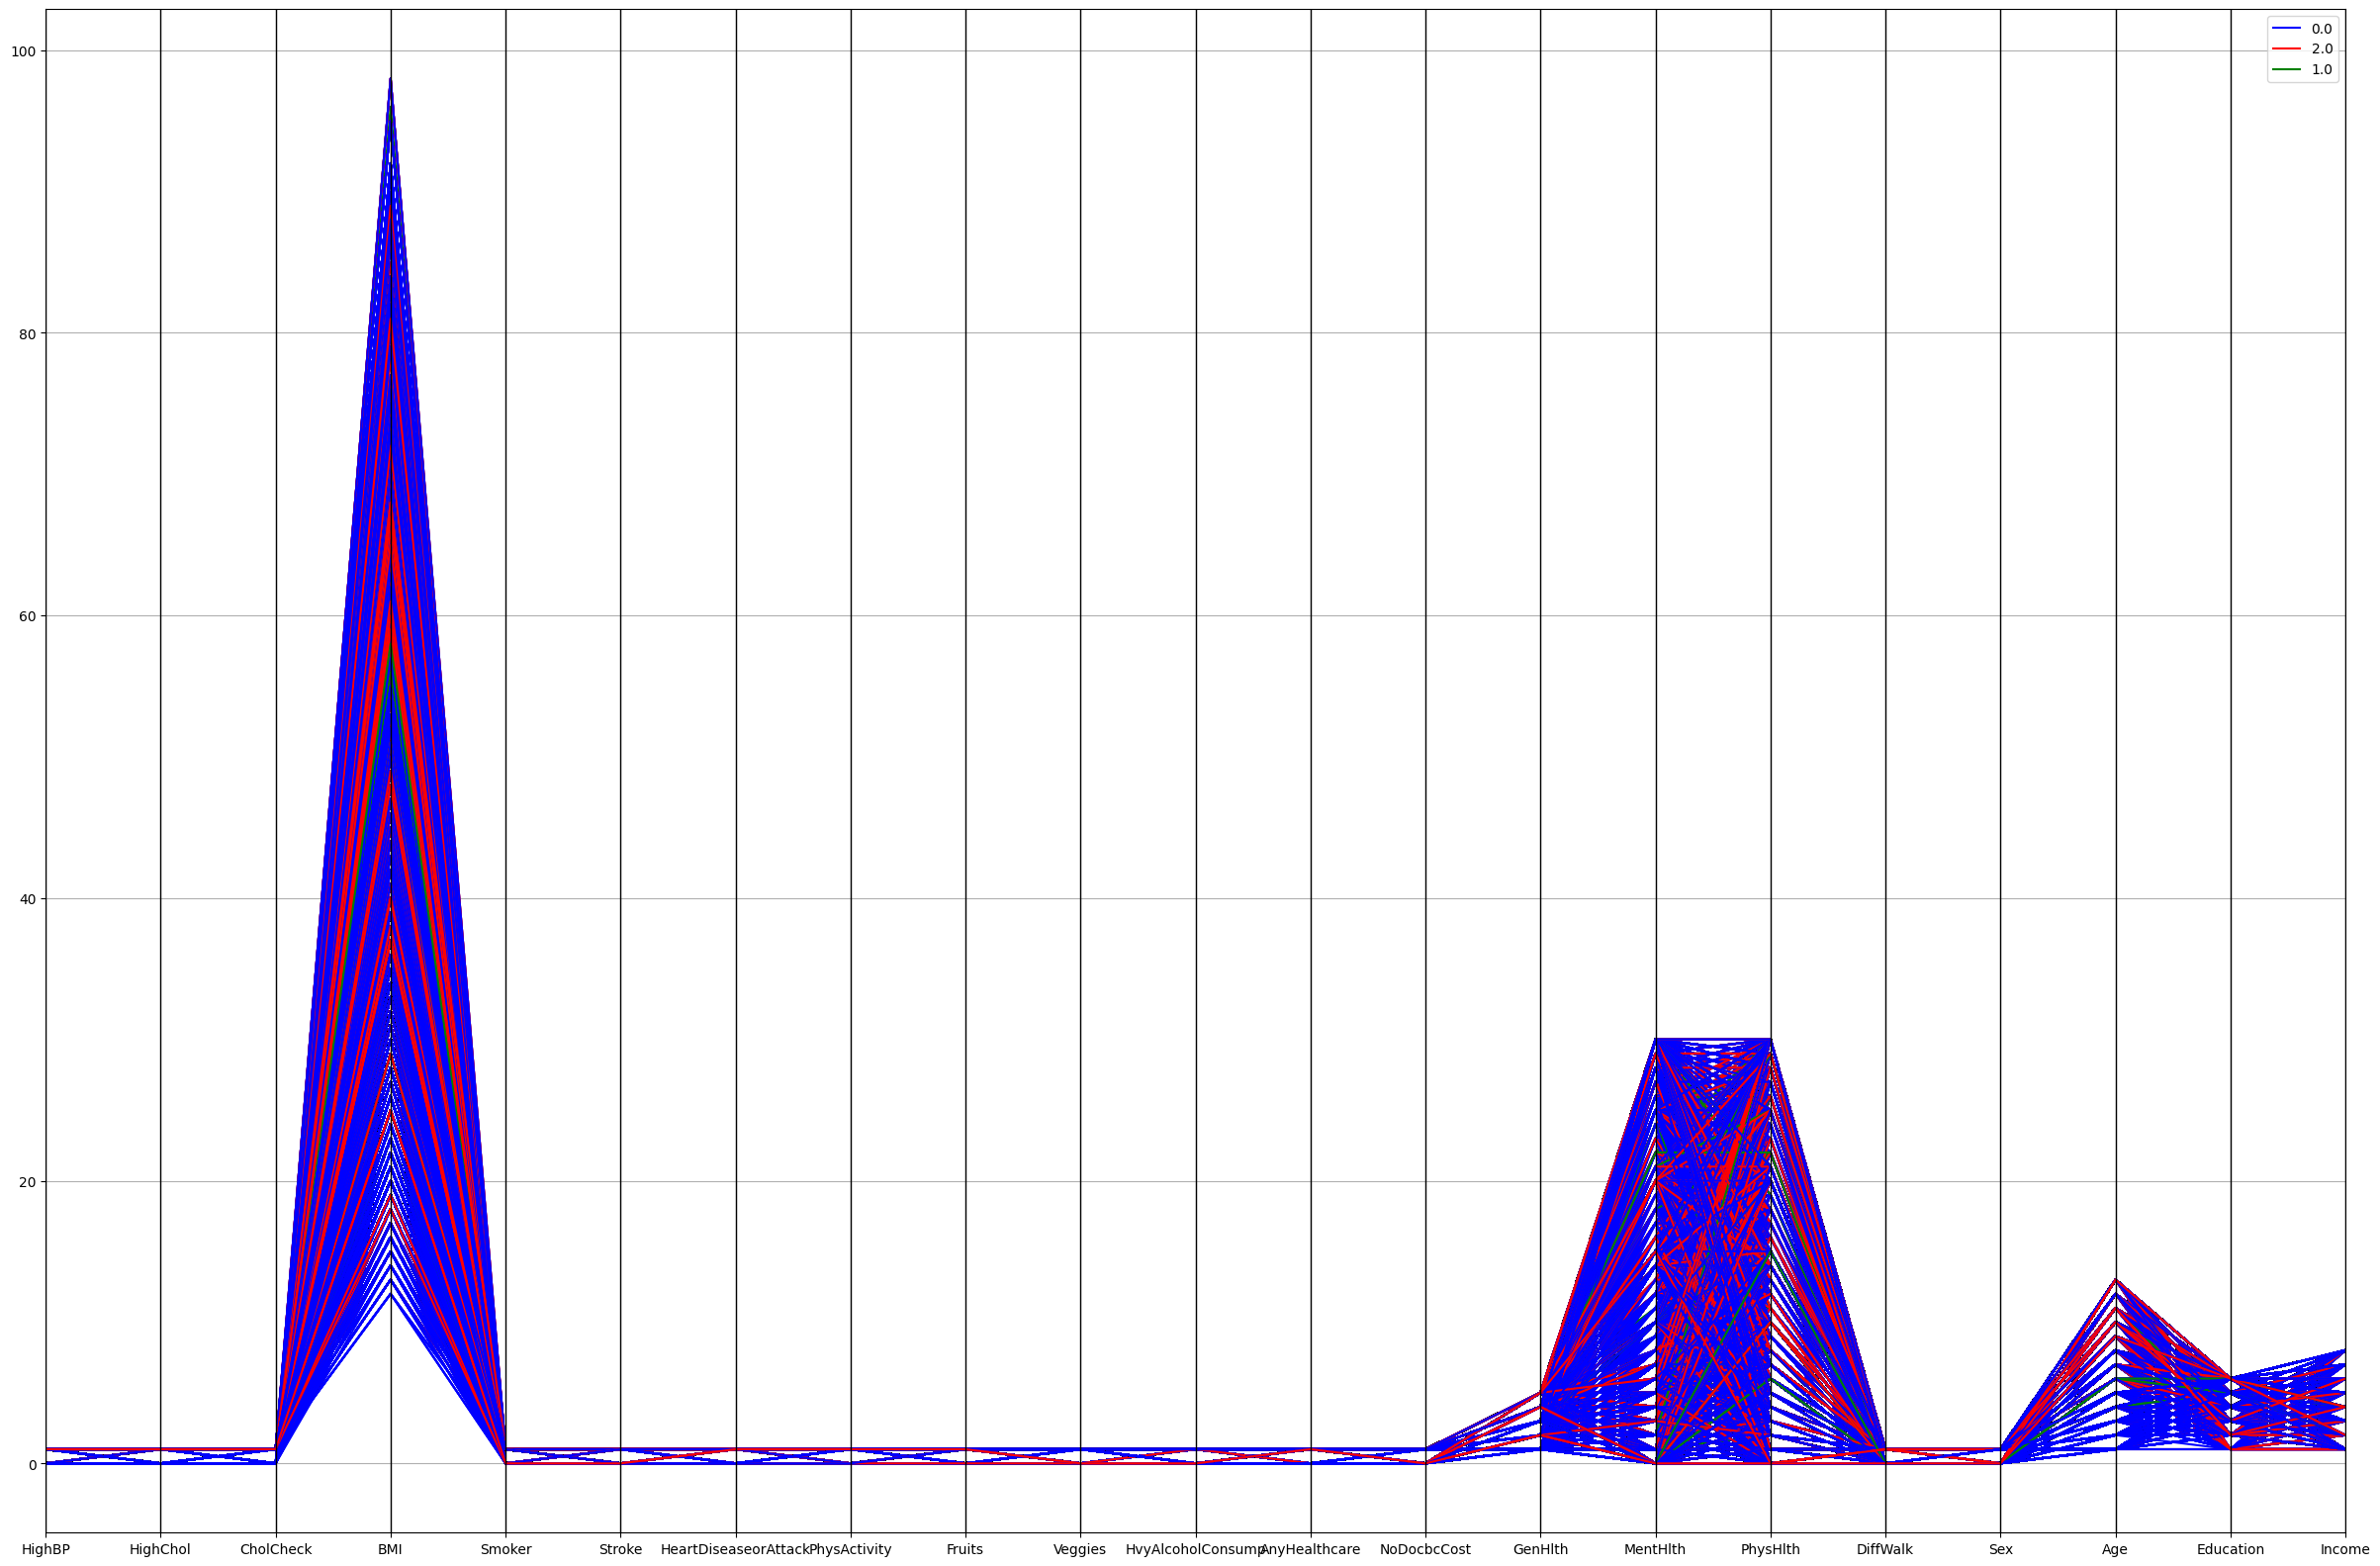

In [6]:
plt.figure(figsize=(30, 20))
parallel_coordinates(data, "Diabetes_012", color = ['blue', 'red', 'green'])

<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #80FF80; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #294B29;
            border-right: 6px solid #0A7D0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پاسخ 1</h2>
        <div class="note">
            از نمودارهای بالا بنظر میرسد فیچرهای زیر بیشترین تاثیر را داشته باشند.در انتخاب فیچرها، باید همبستگی فیچر با تارگت (هدف) بالا باشد و همبستگی فیچر با سایر فیچرها کمینه باشد تا از بایاس جلوگیری شود پس بنظر میرسد توانایی پیشبینی وجود داشته باشد. میتوانیم ضریب همبستگی را با فرمولی در هر فیچر تاثیر دهیم تا وزن دار شوند و درستی مدل ها را با وزنهای مختلفی از فیچرها امتحان کنیم
        </div>
    </div>
</body>
</html>

# feature selection

In [3]:
### Mutual Information
X = data.drop('Diabetes_012', axis=1) 
Y = data['Diabetes_012'] 
high_score_features_mic = []
feature_scores = mutual_info_classif(X, Y, random_state=0)
threshold=8
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
        high_score_features_mic.append(f_name)
print(high_score_features_mic)

['GenHlth', 'HighBP', 'PhysActivity', 'AnyHealthcare', 'CholCheck', 'HighChol', 'Veggies', 'Fruits']


In [4]:
### Chi-Squared
skb = SelectKBest(score_func=chi2, k=threshold)
sel_skb = skb.fit(X, Y)
sel_skb_index = sel_skb.get_support()
df_norm_skb = X.iloc[:, sel_skb_index]
high_score_features_skb = list(df_norm_skb.columns)
print(high_score_features_skb)


['HighBP', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age']


In [5]:
### Pearson Correlation
pearson_list = []
for l in list(X.columns):
    p,_ = pearsonr(X[l], Y)
    pearson_list.append(abs(p))
    
p_value=pd.Series(pearson_list,index=X.columns)
p_value.sort_values(ascending=False,inplace=True)
high_score_features_pearson = list(p_value.index[:threshold])
print(high_score_features_pearson)

['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth']


In [6]:
### best of all
high_score_features = []
for h in  high_score_features_mic:
    if h in high_score_features_skb and h in high_score_features_pearson:
        high_score_features.append(h)

print(high_score_features)

['GenHlth', 'HighBP']


In [3]:
## features:
X = data[['HighBP', 'HighChol', 'BMI', 'Stroke' , 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'Age']]
## target:
Y = data['Diabetes_012']

In [12]:
for column in X:
    print('Missing Values:', f'{round(100*data[column].eq(0).sum()/data.shape[0], 2)} %', f'in {column}')

print(f"Missing Values: {data['BMI'].eq(0).sum()} % in BMI")
data.drop(columns=['MentHlth', 'PhysHlth'], inplace=True)

Missing Values: 57.1 % in HighBP
Missing Values: 57.59 % in HighChol
Missing Values: 0.0 % in BMI
Missing Values: 95.94 % in Stroke
Missing Values: 90.58 % in HeartDiseaseorAttack
Missing Values: 24.35 % in PhysActivity
Missing Values: 0.0 % in GenHlth
Missing Values: 63.09 % in PhysHlth
Missing Values: 0.0 % in Age
Missing Values: 0 % in BMI


-------------------------------------------
# Preprocessing
##### duplicate

In [4]:
print(f'before deleting duplicats : {data.shape}')
data.drop_duplicates(inplace=True)
print(f'after deleting duplicats : {data.shape}')

before deleting duplicats : (253680, 22)
after deleting duplicats : (229781, 22)


##### null

In [14]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

##### outliers

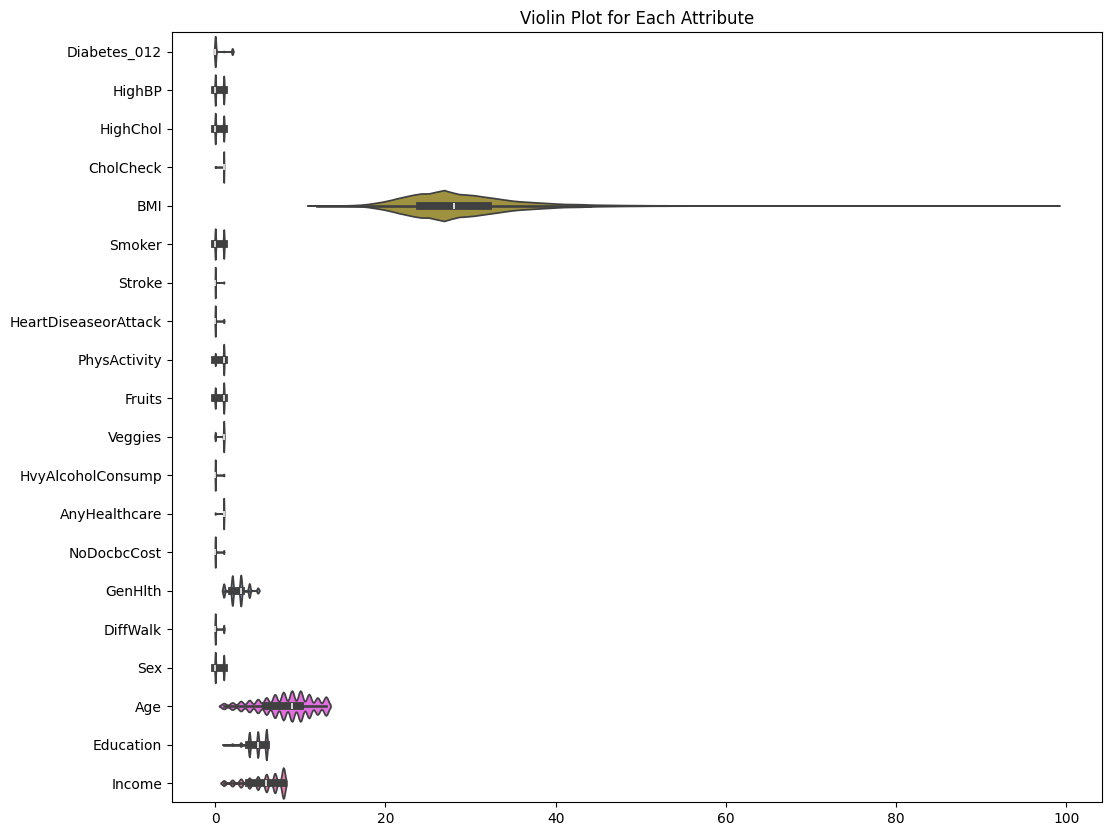

In [15]:
plt.figure(figsize=(12, 10))
sns.violinplot(data=data, orient="h", palette="husl")  
plt.title('Violin Plot for Each Attribute')
plt.show()


In [5]:
print(sorted(data['BMI'].unique()))
print(data['BMI'].median())
print(data['BMI'].mean())

[12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 95.0, 96.0, 98.0]
27.0
28.685670268647105


In [5]:
import numpy as np
# Replacing BMI greater than 50 with the 50
data['BMI'] = np.where(data['BMI'] > 50, 50, data['BMI'])
print(sorted(data['BMI'].unique()))

[12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0]


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #FF8080; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #A34343;
            border-right: 6px solid #7D0A0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پرسش 2</h2>
        <div class="note">
 آیا توازن و تعداد کلاس‌های متغیر هدف (ابتلا و عدم ابتلا به دیابت) به یکدیگر نزدیک است؟ عدم توازن کلاس‌های متغیر هدف چه تاثیری بر مدلسازی خواهد داشت؟
        </div>
    </div>
</body>
</html>

C:\Users\TARANEH\AppData\Local\Temp\ipykernel_1932\1264347862.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=data, palette='Set1')


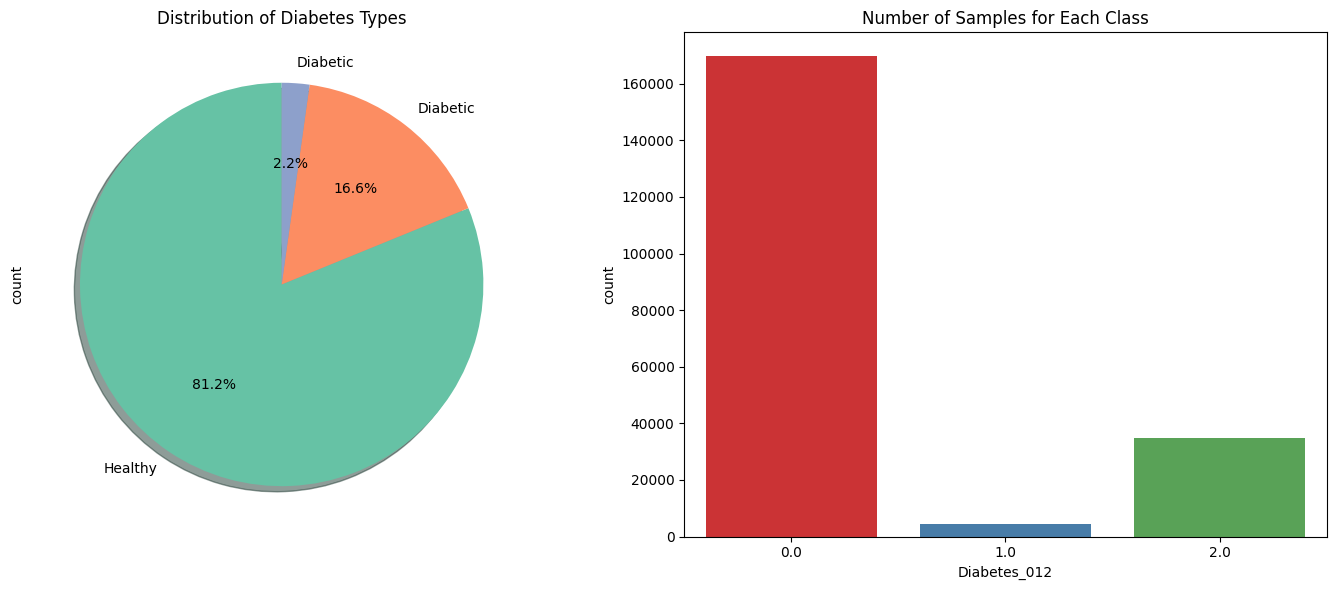

In [18]:
labels = ['Healthy', 'Diabetic', 'Diabetic']
value_counts = data['Diabetes_012'].value_counts()
pie_colors = ['#66c2a5', '#fc8d62', '#8da0cb']
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
value_counts.plot.pie(labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=pie_colors)
plt.title('Distribution of Diabetes Types')
plt.subplot(1, 2, 2)
sns.countplot(x='Diabetes_012', data=data, palette='Set1')
plt.title('Number of Samples for Each Class')
plt.tight_layout()
plt.show()


### یک مثال از خروجی مدل ماشین لرنینگ بدون توازن سازی:

Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


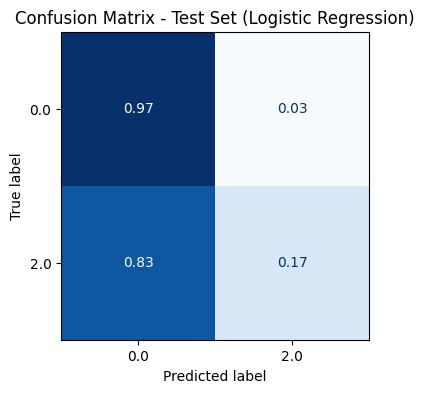

[True,
                         Model  Accuracy  Precision    Recall  F-measure  \
 0  Logistic Regression (Test)  0.847189   0.813662  0.847189   0.812053   
 
    AUC Score  
 0   0.812425  ]

In [14]:
from sklearn.model_selection import train_test_split
diabetes_df = data[data['Diabetes_012'].isin([1, 2])]

Y_combined = Y.replace({1: 2})  

df_combined = X.copy()
df_combined['Diabetes_012'] = Y_combined
Y=Y_combined

before_split_X=X
before_split_Y=Y

X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val= scaler.transform(X_val)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']  
}

model_lr = LogisticRegression(max_iter=1000)

grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)

model_lr_best = LogisticRegression(**best_params_lr, max_iter=1000)
model_lr_best.fit(X_train, y_train)

y_pred_lr_test = model_lr_best.predict(X_test)
y_pred_proba_lr_test = model_lr_best.predict_proba(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
precision_lr_test = precision_score(y_test, y_pred_lr_test, average='weighted')
recall_lr_test = recall_score(y_test, y_pred_lr_test, average='weighted')
f1_lr_test = f1_score(y_test, y_pred_lr_test, average='weighted')
if len(set(y_test)) == 2:
    auc_lr_test = roc_auc_score(y_test, y_pred_proba_lr_test[:, 1])
else:
    auc_lr_test = roc_auc_score(y_test, y_pred_proba_lr_test, multi_class='ovr')

model_metrics_lr_test = pd.DataFrame({
    'Model': ['Logistic Regression (Test)'],
    'Accuracy': [accuracy_lr_test],
    'Precision': [precision_lr_test],
    'Recall': [recall_lr_test],
    'F-measure': [f1_lr_test],
    'AUC Score': [auc_lr_test]
})

model_metrics_df = [model_metrics_df, model_metrics_lr_test]

cm_test_lr = confusion_matrix(y_test, y_pred_lr_test, labels=model_lr_best.classes_)

cm_test_lr_normalized = cm_test_lr.astype(float) / cm_test_lr.sum(axis=1)[:, np.newaxis]

disp_test_lr = ConfusionMatrixDisplay(confusion_matrix=cm_test_lr_normalized, display_labels=model_lr_best.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp_test_lr.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')  
ax.set_title('Confusion Matrix - Test Set (Logistic Regression)')
plt.show()

model_metrics_df



In [15]:
model_metrics_df.clear

<function list.clear()>

<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #80FF80; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #294B29;
            border-right: 6px solid #0A7D0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
            direction: ltr;
            text-align: left;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پاسخ 2</h2>
        <div class="note">
            دیدیم که در دیتاست تعداد دیتایی که از هر نوع تارگت داریم برابر نیست و باعث بایاس در مدل‌ها می‌شود. 
            عدم توازن کلاس‌های متغیر هدف می‌تواند باعث شود که مدل به سمت کلاس‌های پرجمعیت‌تر تمایل پیدا کند و دقت مدل در شناسایی کلاس‌های کمتر مشاهده‌شده کاهش یابد
        </div>
    </div>
</body>
</html>


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #FF8080; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #A34343;
            border-right: 6px solid #7D0A0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پرسش 3</h2>
        <div class="note">
        با توجه به پاسخی که به پرسش  قبل دادید آیا تلفیق کلاس پیش‌دیابت و دیابت می‌تواند تصمیم معقولی باشد؟ اگر بله، این دو دسته را برای پاسخ به سوالات بعدی با یکدیگر ادغام کنید. 
        </div>
    </div>
</body>
</html>

<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #80FF80; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #294B29;
            border-right: 6px solid #0A7D0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
            direction: ltr;
            text-align: left;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پاسخ 3</h2>
        <div class="note">
        این کار زمانی منطقی است که کلاسها بهم شباهت داشته باشند و کلاسی که از اجتماع آنها بدست می آید معنی داشته باشد. یعنی تلفیق کردن دو تارگت به دانش از آن حوزه نیاز دارد و اینجا تلفیق دیابت و پیش دیابت از لحاظ پزشکی هم منطقی است.
        </div>
    </div>
</body>
</html>


In [11]:
diabetes_df = data[data['Diabetes_012'].isin([1, 2])]

In [14]:
print("Number of samples before combining:")
print(Y.value_counts())

Y_combined = Y.replace({1: 2})  

df_combined = X.copy()
df_combined['Diabetes_012'] = Y_combined

print("\nNumber of samples after combining:")
print(df_combined['Diabetes_012'].value_counts())


Number of samples before combining:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Number of samples after combining:
Diabetes_012
0.0    213703
2.0     39977
Name: count, dtype: int64


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #FF8080; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #A34343;
            border-right: 6px solid #7D0A0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پرسش 4</h2>
        <div class="note">
        حتی پس از تلفیق کلاس‌های دیابت و پیش‌دیابت، باز هم ممکن است توازن دو کلاس ایجاد شده (عدم دیابت / دیابت) یکسان نباشد. برای حل مسئله عدم توازن کلاس‌های متغیر هدف چه راهکاری را در پیش می‌گیرید؟
        </div>
    </div>
</body>
</html>

<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #80FF80; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #294B29;
            border-right: 6px solid #0A7D0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
            direction: ltr;
            text-align: left;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پاسخ 4</h2>
        <div class="note">
        برای حل این مشکل می‌توانیم دیتاهارا حذف کنیم تا برابر شوند یا داده جدید مطابق با دیتایی که داریم تولید کنیم تا متوازن شود. مدل های زیر می‌توانند کمک کنند:
            <ol>
                <li>SMOTE (Synthetic Minority Over-sampling Technique)</li>
                <li>ADASYN (Adaptive Synthetic Sampling)</li>
                <li>Combination of Over-sampling and Under-sampling</li>
                <li>Balanced Random Forest</li>
                <li>Class Weights</li>
                <li>NearMiss</li>
            </ol>
        </div>
    </div>
</body>
</html>


In [15]:
Y=Y_combined
print("Before SMOTE:")
print(Counter(Y))
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
print("After SMOTE:")
print(Counter(Y))


Before SMOTE:
Counter({0.0: 213703, 2.0: 39977})
After SMOTE:
Counter({0.0: 213703, 2.0: 213703})


# splitting data

In [16]:
from sklearn.model_selection import train_test_split

before_split_X=X
before_split_Y=Y

X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (256443, 9)
y_train shape:  (256443,)
X_val shape:  (85481, 9)
y_val shape:  (85481,)
X_test shape:  (85482, 9)
y_test shape:  (85482,)


In [17]:
### scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val= scaler.transform(X_val)

print("Scaled X_train shape:", X_train.shape)
print("Scaled X_val shape:", X_val.shape)
print("Scaled X_test shape:", X_test.shape)


Scaled X_train shape: (256443, 9)
Scaled X_val shape: (85481, 9)
Scaled X_test shape: (85482, 9)


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #FF8080; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #A34343;
            border-right: 6px solid #7D0A0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پرسش 6 و 5</h2>
        <div class="note">
        برای گزارش خطر ابتلا به دیابت یک مدل دسته‌بندی (کلیسفیکشن) ایجاد کنید و عملکرد آن را با استفاده از داده‌های ترین و ولیدیشن و تست گزارش کنید.
        با استفاده از مجموعه ولیدیشن بهترین پارامتر(ها)ی هر مدلی که ایجاد می‌کنید را تخمین بزنید. 
        </div>
    </div>
</body>
</html>

# Models

In [18]:
model_metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F-measure', 'AUC Score'])

#### Neural Network

C:\Users\TARANEH\AppData\Local\Temp\ipykernel_10052\1311600621.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_metrics_df = pd.concat([model_metrics_df, model_metrics_nn_test], ignore_index=True)


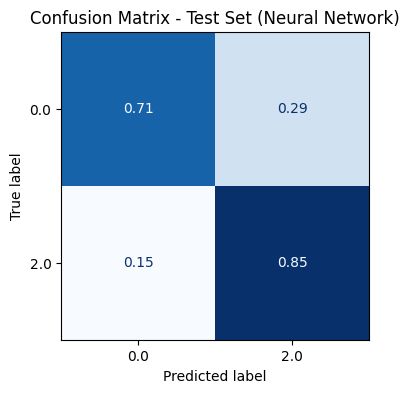

,Model,Accuracy,Precision,Recall,F-measure,AUC Score
0,Neural Network (Test),0.780129,0.785695,0.780129,0.779092,0.874768


In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_nn = MLPClassifier()

model_nn.fit(X_train, y_train)

y_pred_nn_test = model_nn.predict(X_test)
y_pred_proba_nn_test = model_nn.predict_proba(X_test)

accuracy_nn_test = accuracy_score(y_test, y_pred_nn_test)
precision_nn_test = precision_score(y_test, y_pred_nn_test, average='weighted')
recall_nn_test = recall_score(y_test, y_pred_nn_test, average='weighted')
f1_nn_test = f1_score(y_test, y_pred_nn_test, average='weighted')
if len(set(y_test)) == 2:
    auc_nn_test = roc_auc_score(y_test, y_pred_proba_nn_test[:, 1])
else:
    auc_nn_test = roc_auc_score(y_test, y_pred_proba_nn_test, multi_class='ovr')

model_metrics_nn_test = pd.DataFrame({
    'Model': ['Neural Network (Test)'],
    'Accuracy': [accuracy_nn_test],
    'Precision': [precision_nn_test],
    'Recall': [recall_nn_test],
    'F-measure': [f1_nn_test],
    'AUC Score': [auc_nn_test]
})
model_metrics_df = pd.concat([model_metrics_df, model_metrics_nn_test], ignore_index=True)

cm_test_nn = confusion_matrix(y_test, y_pred_nn_test, labels=model_nn.classes_)

cm_test_nn_normalized = cm_test_nn.astype(float) / cm_test_nn.sum(axis=1)[:, np.newaxis]

disp_test_nn = ConfusionMatrixDisplay(confusion_matrix=cm_test_nn_normalized, display_labels=model_nn.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
disp_test_nn.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')  
ax.set_title('Confusion Matrix - Test Set (Neural Network)')
plt.show()
model_metrics_df


##### Naive Bayes

Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}


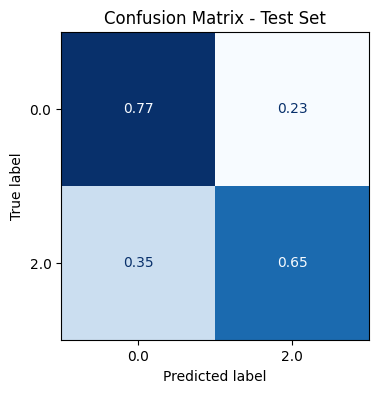

,Model,Accuracy,Precision,Recall,F-measure,AUC Score
0,Naive Bayes (Test),0.711167,0.714298,0.711167,0.710054,0.787347


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

model_nb = GaussianNB()

grid_search = GridSearchCV(estimator=model_nb, param_grid=param_grid, scoring='accuracy', cv=[(np.arange(len(X_train)), np.arange(len(X_train), len(X_train) + len(X_val)))])

X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))
grid_search.fit(X_combined, y_combined)

best_params = grid_search.best_params_
print("Best Parameters for Naive Bayes:", best_params)

model_nb_best = GaussianNB(**best_params)
model_nb_best.fit(X_train, y_train)

y_pred_nb_test = model_nb_best.predict(X_test)
y_pred_proba_nb_test = model_nb_best.predict_proba(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
precision_nb_test = precision_score(y_test, y_pred_nb_test, average='weighted')
recall_nb_test = recall_score(y_test, y_pred_nb_test, average='weighted')
f1_nb_test = f1_score(y_test, y_pred_nb_test, average='weighted')
if len(set(y_test)) == 2:
    auc_nb_test = roc_auc_score(y_test, y_pred_proba_nb_test[:, 1])
else:
    auc_nb_test = roc_auc_score(y_test, y_pred_proba_nb_test, multi_class='ovr')

model_metrics_test = pd.DataFrame({
    'Model': ['Naive Bayes (Test)'],
    'Accuracy': [accuracy_nb_test],
    'Precision': [precision_nb_test],
    'Recall': [recall_nb_test],
    'F-measure': [f1_nb_test],
    'AUC Score': [auc_nb_test]
})

model_metrics_df = pd.DataFrame()

model_metrics_df = pd.concat([model_metrics_df, model_metrics_test], ignore_index=True)

cm_test = confusion_matrix(y_test, y_pred_nb_test, labels=model_nb_best.classes_)

cm_test_normalized = cm_test.astype(float) / cm_test.sum(axis=1)[:, np.newaxis]

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=model_nb_best.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp_test.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')  
ax.set_title('Confusion Matrix - Test Set')
plt.show()

model_metrics_df


##### LogisticRegression

Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


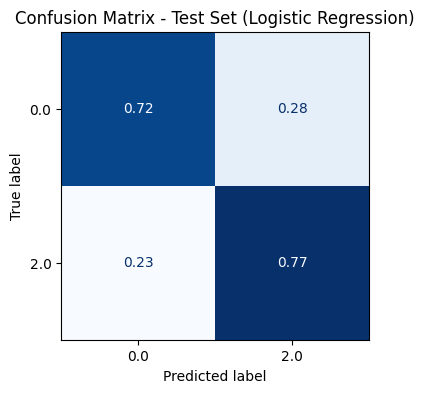

,Model,Accuracy,Precision,Recall,F-measure,AUC Score
0,Naive Bayes (Test),0.711167,0.714298,0.711167,0.710054,0.787347
1,Logistic Regression (Test),0.743607,0.744183,0.743607,0.743473,0.816583


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']  
}

model_lr = LogisticRegression(max_iter=1000)

grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)

model_lr_best = LogisticRegression(**best_params_lr, max_iter=1000)
model_lr_best.fit(X_train, y_train)

y_pred_lr_test = model_lr_best.predict(X_test)
y_pred_proba_lr_test = model_lr_best.predict_proba(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
precision_lr_test = precision_score(y_test, y_pred_lr_test, average='weighted')
recall_lr_test = recall_score(y_test, y_pred_lr_test, average='weighted')
f1_lr_test = f1_score(y_test, y_pred_lr_test, average='weighted')
if len(set(y_test)) == 2:
    auc_lr_test = roc_auc_score(y_test, y_pred_proba_lr_test[:, 1])
else:
    auc_lr_test = roc_auc_score(y_test, y_pred_proba_lr_test, multi_class='ovr')

model_metrics_lr_test = pd.DataFrame({
    'Model': ['Logistic Regression (Test)'],
    'Accuracy': [accuracy_lr_test],
    'Precision': [precision_lr_test],
    'Recall': [recall_lr_test],
    'F-measure': [f1_lr_test],
    'AUC Score': [auc_lr_test]
})

model_metrics_df = pd.concat([model_metrics_df, model_metrics_lr_test], ignore_index=True)

cm_test_lr = confusion_matrix(y_test, y_pred_lr_test, labels=model_lr_best.classes_)

cm_test_lr_normalized = cm_test_lr.astype(float) / cm_test_lr.sum(axis=1)[:, np.newaxis]

disp_test_lr = ConfusionMatrixDisplay(confusion_matrix=cm_test_lr_normalized, display_labels=model_lr_best.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp_test_lr.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')  
ax.set_title('Confusion Matrix - Test Set (Logistic Regression)')
plt.show()

model_metrics_df


##### DecisionTreeClassifier

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


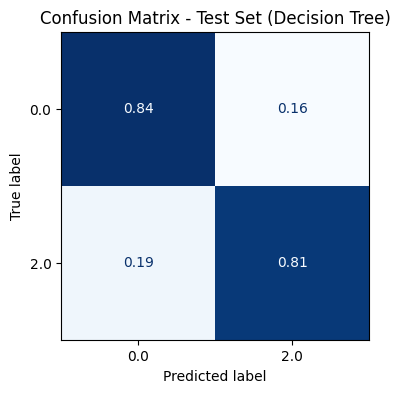

,Model,Accuracy,Precision,Recall,F-measure,AUC Score
0,Naive Bayes (Test),0.711167,0.714298,0.711167,0.710054,0.787347
1,Logistic Regression (Test),0.743607,0.744183,0.743607,0.743473,0.816583
2,Decision Tree (Test),0.822594,0.822778,0.822594,0.822564,0.874037


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

model_dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

model_dt_best = DecisionTreeClassifier(**best_params_dt)
model_dt_best.fit(X_train, y_train)

y_pred_dt_test = model_dt_best.predict(X_test)
y_pred_proba_dt_test = model_dt_best.predict_proba(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
precision_dt_test = precision_score(y_test, y_pred_dt_test, average='weighted')
recall_dt_test = recall_score(y_test, y_pred_dt_test, average='weighted')
f1_dt_test = f1_score(y_test, y_pred_dt_test, average='weighted')
if len(set(y_test)) == 2:
    auc_dt_test = roc_auc_score(y_test, y_pred_proba_dt_test[:, 1])
else:
    auc_dt_test = roc_auc_score(y_test, y_pred_proba_dt_test, multi_class='ovr')

model_metrics_dt_test = pd.DataFrame({
    'Model': ['Decision Tree (Test)'],
    'Accuracy': [accuracy_dt_test],
    'Precision': [precision_dt_test],
    'Recall': [recall_dt_test],
    'F-measure': [f1_dt_test],
    'AUC Score': [auc_dt_test]
})

model_metrics_df = pd.concat([model_metrics_df, model_metrics_dt_test], ignore_index=True)

cm_test_dt = confusion_matrix(y_test, y_pred_dt_test, labels=model_dt_best.classes_)

cm_test_dt_normalized = cm_test_dt.astype(float) / cm_test_dt.sum(axis=1)[:, np.newaxis]

disp_test_dt = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt_normalized, display_labels=model_dt_best.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp_test_dt.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')  
ax.set_title('Confusion Matrix - Test Set (Decision Tree)')
plt.show()

model_metrics_df


##### RandomForestClassifier
##### witout validation

C:\Users\TARANEH\AppData\Local\Temp\ipykernel_12096\3606354970.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_metrics_df = pd.concat([model_metrics_df, model_metrics_rf_test], ignore_index=True)


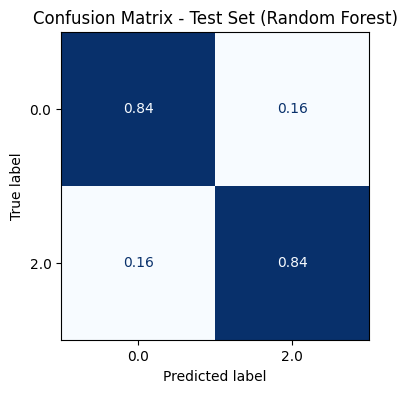

,Model,Accuracy,Precision,Recall,F-measure,AUC Score
0,Random Forest (Test),0.835895,0.835895,0.835895,0.835895,0.91885


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

joblib.dump(model_rf, 'random_forest_model.pkl')


y_pred_rf_test = model_rf.predict(X_test)
y_pred_proba_rf_test = model_rf.predict_proba(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
precision_rf_test = precision_score(y_test, y_pred_rf_test, average='weighted')
recall_rf_test = recall_score(y_test, y_pred_rf_test, average='weighted')
f1_rf_test = f1_score(y_test, y_pred_rf_test, average='weighted')
if len(set(y_test)) == 2:
    auc_rf_test = roc_auc_score(y_test, y_pred_proba_rf_test[:, 1])
else:
    auc_rf_test = roc_auc_score(y_test, y_pred_proba_rf_test, multi_class='ovr')

model_metrics_rf_test = pd.DataFrame({
    'Model': ['Random Forest (Test)'],
    'Accuracy': [accuracy_rf_test],
    'Precision': [precision_rf_test],
    'Recall': [recall_rf_test],
    'F-measure': [f1_rf_test],
    'AUC Score': [auc_rf_test]
})
model_metrics_df = pd.concat([model_metrics_df, model_metrics_rf_test], ignore_index=True)

cm_test_rf = confusion_matrix(y_test, y_pred_rf_test, labels=model_rf.classes_)
cm_test_rf_normalized = cm_test_rf.astype(float) / cm_test_rf.sum(axis=1)[:, np.newaxis]
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf_normalized, display_labels=model_rf.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
disp_test_rf.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')
ax.set_title('Confusion Matrix - Test Set (Random Forest)')
plt.show()
model_metrics_df


##### KNN
##### witout validation

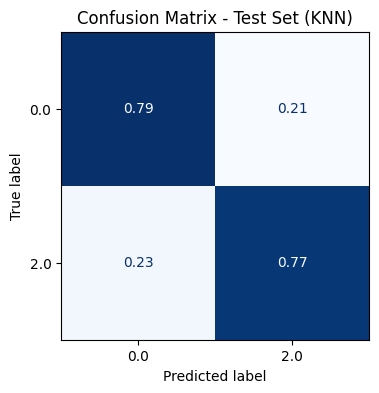

,Model,Accuracy,Precision,Recall,F-measure,AUC Score
0,Naive Bayes (Test),0.711167,0.714298,0.711167,0.710054,0.787347
1,Logistic Regression (Test),0.743607,0.744183,0.743607,0.743473,0.816583
2,Decision Tree (Test),0.822594,0.822778,0.822594,0.822564,0.874037
3,Random Forest (Test),0.834620,0.834622,0.834620,0.834619,0.918302
4,KNN (Test),0.781124,0.781184,0.781124,0.781108,0.859593


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)

y_pred_knn_test = model_knn.predict(X_test)
y_pred_proba_knn_test = model_knn.predict_proba(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
precision_knn_test = precision_score(y_test, y_pred_knn_test, average='weighted')
recall_knn_test = recall_score(y_test, y_pred_knn_test, average='weighted')
f1_knn_test = f1_score(y_test, y_pred_knn_test, average='weighted')
if len(set(y_test)) == 2:
    auc_knn_test = roc_auc_score(y_test, y_pred_proba_knn_test[:, 1])
else:
    auc_knn_test = roc_auc_score(y_test, y_pred_proba_knn_test, multi_class='ovr')

model_metrics_knn_test = pd.DataFrame({
    'Model': ['KNN (Test)'],
    'Accuracy': [accuracy_knn_test],
    'Precision': [precision_knn_test],
    'Recall': [recall_knn_test],
    'F-measure': [f1_knn_test],
    'AUC Score': [auc_knn_test]
})

model_metrics_df = pd.concat([model_metrics_df, model_metrics_knn_test], ignore_index=True)

cm_test_knn = confusion_matrix(y_test, y_pred_knn_test, labels=model_knn.classes_)

cm_test_knn_normalized = cm_test_knn.astype(float) / cm_test_knn.sum(axis=1)[:, np.newaxis]

disp_test_knn = ConfusionMatrixDisplay(confusion_matrix=cm_test_knn_normalized, display_labels=model_knn.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp_test_knn.plot(ax=ax, cmap='Blues', colorbar=False, values_format='.2f')  
ax.set_title('Confusion Matrix - Test Set (KNN)')
plt.show()

model_metrics_df


Evaluation Results:


,Model,Accuracy,Precision,Recall,F-measure,AUC Score
3,Random Forest (Test),0.834620,0.834622,0.834620,0.834619,0.918302
2,Decision Tree (Test),0.822594,0.822778,0.822594,0.822564,0.874037
4,KNN (Test),0.781124,0.781184,0.781124,0.781108,0.859593
1,Logistic Regression (Test),0.743607,0.744183,0.743607,0.743473,0.816583
0,Naive Bayes (Test),0.711167,0.714298,0.711167,0.710054,0.787347


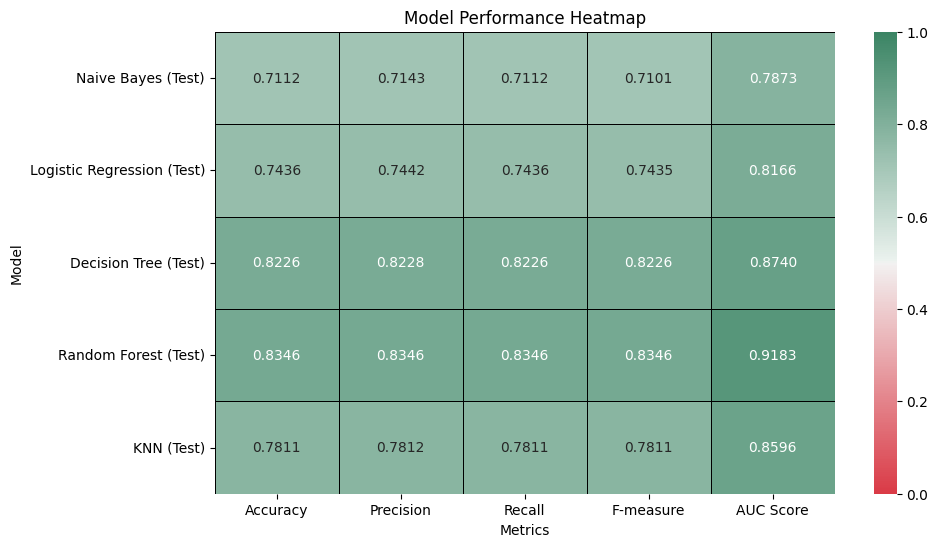

C:\Users\TARANEH\AppData\Local\Temp\ipykernel_12096\3560905267.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  # تنظیم موقعیت legend در صورت نیاز


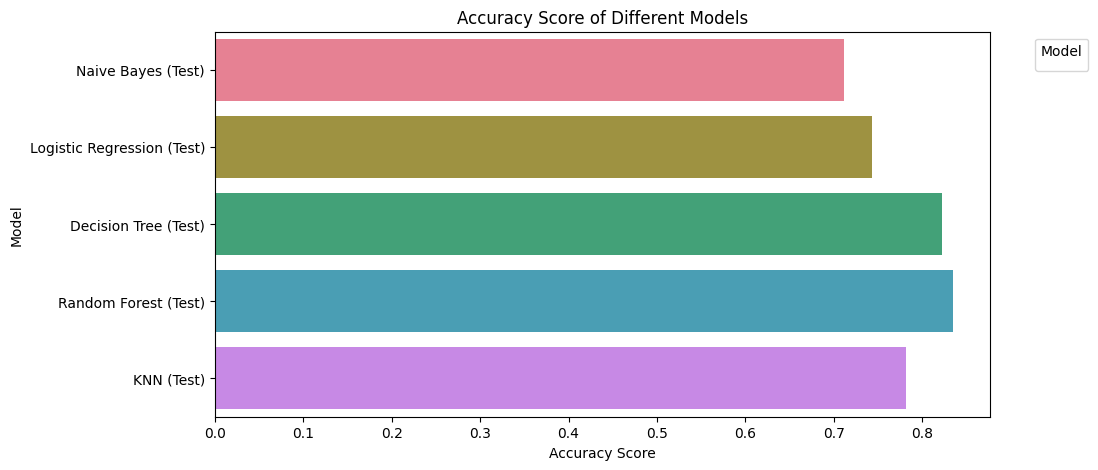

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

model_metrics_df.iloc[:, 1:] = model_metrics_df.iloc[:, 1:].astype(float)

print("Evaluation Results:")
model_metrics_df_sorted = model_metrics_df.sort_values(by='Accuracy', ascending=False)
display(model_metrics_df_sorted)

heatmap_data = model_metrics_df.set_index('Model')

cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap=cmap, cbar=True, vmin=0, vmax=1, linewidths=0.5, linecolor='black', fmt='.4f')
plt.title('Model Performance Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Model')
plt.show()

palette = sns.color_palette("husl", len(model_metrics_df))

plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=model_metrics_df, palette=palette, hue='Model', dodge=False)
plt.title('Accuracy Score of Different Models')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #FF8080; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #A34343;
            border-right: 6px solid #7D0A0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پرسش 8 و 7</h2>
        <div class="note">
        مهم‌ترین متغیرها در پیش‌بینی دیابت کدام متغیرها هستند؟
     کدام متغیرها در پیش‌بینی دیابت نقشی بازی نمی‌کنند و بهتر از است آن‌ها را از مدل نهایی حذف کنیم تا اطلاعات غیرضروری از کاربر دریافت نکنیم؟
        </div>
    </div>
</body>
</html>

<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #80FF80; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #294B29;
            border-right: 6px solid #0A7D0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
            direction: ltr;
            text-align: left;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پاسخ 8 و 7</h2>
        <div class="note">
        مدل رندوم فارست که بهترین پرفورمنس را داشت با 4 دسته فیچری که قبلا تولید کرده بودیم امتحان کردیم و نتایج هر دسته از فیچر ها را در سلول زیر میتوانیم بررسی کنیم. بر اساس آنها فیچرهایی که اکورسی بالاتر داده اند را نگه داریم و باقی که اهمیت زیادی نداشته اند حذف کنیم. بهترین فیچر همان فیچر اولیه ای بود که چشمی انتخاب کرده بودیم
        </div>
    </div>
</body>
</html>


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

smote = SMOTE(random_state=1)

feature_sets = {
    'Original Features': ['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'Age'],
    'Pearson': high_score_features_pearson,
    'SKB': high_score_features_skb,
    'MIC': high_score_features_mic
}

model_metrics_df = pd.DataFrame()

data_sample = data.sample(frac=0.1, random_state=1)  
for name, features in feature_sets.items():
    X_features = data_sample[features]
    y = data_sample['Diabetes_012']
    
    X_resampled, y_resampled = smote.fit_resample(X_features, y)
    
    X_train_features, X_test_features, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_features)
    X_test_scaled = scaler.transform(X_test_features)
    
    model_rf = RandomForestClassifier(random_state=1, n_jobs=-1)
    model_rf.fit(X_train, y_train)
    
    y_pred_rf_test = model_rf.predict(X_test_scaled)
    y_pred_proba_rf_test = model_rf.predict_proba(X_test_scaled)
    accuracy_rf_test = metrics.accuracy_score(y_test, y_pred_rf_test)
    precision_rf_test = metrics.precision_score(y_test, y_pred_rf_test, average='weighted')
    recall_rf_test = metrics.recall_score(y_test, y_pred_rf_test, average='weighted')
    f1_rf_test = metrics.f1_score(y_test, y_pred_rf_test, average='weighted')
    auc_rf_test = metrics.roc_auc_score(y_test, y_pred_proba_rf_test, multi_class='ovr')
    
    model_metrics_test = pd.DataFrame({
        'Model': [f'Random Forest (Test) - {name}'],
        'Accuracy': [accuracy_rf_test],
        'Precision': [precision_rf_test],
        'Recall': [recall_rf_test],
        'F-measure': [f1_rf_test],
        'AUC Score': [auc_rf_test]
    })
    model_metrics_df = pd.concat([model_metrics_df, model_metrics_test], ignore_index=True)

model_metrics_df_sorted = model_metrics_df.sort_values(by='Accuracy', ascending=False)
model_metrics_df_sorted


,Model,Accuracy,Precision,Recall,F-measure,AUC Score
0,Random Forest (Test) - Original Features,0.843531,0.843415,0.843531,0.843421,0.951670
1,Random Forest (Test) - Pearson,0.829722,0.829141,0.829722,0.829326,0.946214
2,Random Forest (Test) - SKB,0.827928,0.827096,0.827928,0.827273,0.946501
3,Random Forest (Test) - MIC,0.507384,0.503141,0.507384,0.496315,0.695568


# second model :
### تشخیص دیابت از پیش دیابت

In [57]:
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253666,1.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,15.0,0.0,0.0,6.0,5.0,2.0
253668,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [13]:
print(diabetes_df[diabetes_df['Diabetes_012'].isin([0])].shape)
print(diabetes_df[diabetes_df['Diabetes_012'].isin([1])].shape)
print(diabetes_df[diabetes_df['Diabetes_012'].isin([2])].shape)

(0, 22)
(4629, 22)
(35097, 22)


In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


X = diabetes_df.drop(columns=['Diabetes_012'])
y = diabetes_df['Diabetes_012']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, val_index in cv.split(X_train, y_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]
    mlp.fit(X_cv_train, y_cv_train)
    y_cv_pred = mlp.predict(X_cv_val)
    accuracies.append(accuracy_score(y_cv_val, y_cv_pred))

mean_cv_accuracy = np.mean(accuracies)

mlp.fit(X_train, y_train)
y_test_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
mean_cv_accuracy, test_accuracy


(0.8721752292761107, 0.8773416910036327)

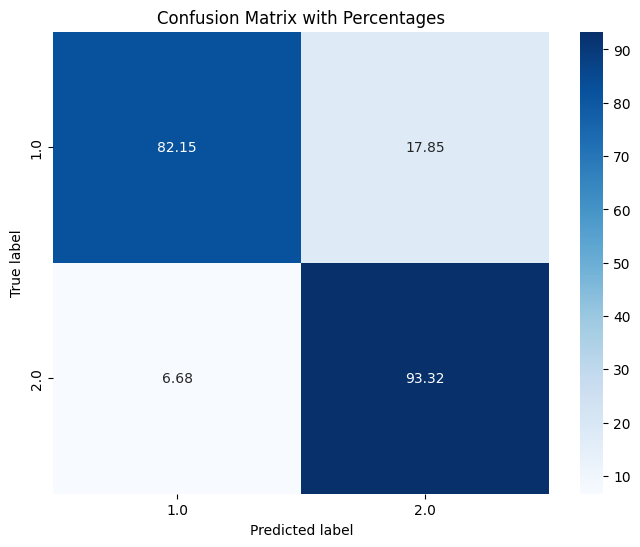

In [26]:
joblib.dump(mlp, 'diabetes_mlp_model.joblib')

y_test_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Percentages')
plt.show()


<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #FF8080; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #A34343;
            border-right: 6px solid #7D0A0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پرسش9 و 10</h2>
        <div class="note">
 مدل خود را برای خودتان و چند نفر از دوستانتان تست کنید و خطر ابتلا به دیابت را به آن‌ها گزارش کنید. آیا پاسخ‌ها معقول است؟ 
 آیا مدل شما می‌تواند در مدت زمان معقولی (مثلا در کمتر یک ثانیه) پاسخ خود را ارائه کند؟ مدل خود را از نظر حجم پردازش مورد نیاز و در هر پیش‌بینی و پیچیدگی محاسباتی آن تحلیل کنید.
        </div>
    </div>
</body>
</html>

<!DOCTYPE html>
<html lang="fa">
<head>
    <meta charset="UTF-8">
    <title>پرسش ها</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            direction: rtl;
            font-family: 'Tahoma', Arial, sans-serif;
            background-color: #333;
            color: #fff;
        }
        .content {
            max-width: 800px;
            background-color: #444;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
            text-align: center;
        }
        h2 {
            color: #80FF80; 
        }
        p {
            line-height: 1.6;
            margin: 15px 0;
        }
        .note {
            background-color: #294B29;
            border-right: 6px solid #0A7D0A;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            text-align: right;
            direction: ltr;
            text-align: left;
        }
    </style>
</head>
<body>
    <div class="content">
        <h2>پاسخ 9و10 </h2>
        <div class="note">
            کد زیر فیچرهارا از کاربر میگیرد و پیشبینی رااز مدل سیو شده بدست می آورد و خروجی میدهد.
            <br><br>
            برای افزایش سرعت با پردازش موازی، می‌توان از پارامتر n_jobs=-1 برای GridSearchCV استفاده که به معنی استفاده از تمام هسته‌های پردازنده است. 
        </div>
    </div>
</body>
</html>


In [21]:
# پردازش دیابت دارد یا ندارد
import joblib
import pandas as pd

model_rf = joblib.load('random_forest_model.pkl')

feature_names = ['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'Age']

def get_user_input():
    user_data = {}
    print("Please enter the values for the following features:")
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_data[feature] = value
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    return pd.DataFrame([user_data], columns=feature_names)

user_input_df = get_user_input()


prediction = model_rf.predict(user_input_df)
print(f"The predicted class is: {prediction[0]}")


Please enter the values for the following features:
The predicted class is: 2.0


c:\Users\TARANEH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [22]:
# پردازش دیابت دارد یا پیش دیابت

import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
if(prediction[0]==2):
        
    mlp = joblib.load('diabetes_mlp_model.joblib')

    scaler = StandardScaler()

    input_features = []
    feature_names = [f'Feature{i+1}' for i in range(21)]  
    print("Enter values for the following features:")
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_features.append(value)

    input_features = np.array(input_features).reshape(1, -1)

    input_features_scaled = scaler.fit_transform(input_features)  

    prediction = mlp.predict(input_features_scaled)

    if prediction[0] == 1:
        print("Diabetes Type 1")
    else:
        print("Diabetes Type 2")


Enter values for the following features:
Diabetes Type 1
